# MiniProject - TANG YAO BING

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
import math as math
sb.set() # set the default Seaborn style for graphics

# The Data Set we will be exploring will be regarding Diabetes. 

The following columns give the following details: 

-Diabetes_binary: 0 = no diabetes, 1 = diabetes.

-HighBP: 0 = no high BP, 1 = high BP.

-HighChol: 0 = no high cholesterol 1 = high cholesterol. 

-CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

-BMI: Body Mass Index

-Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

-Stroke:(Ever told) you had a stroke. 0 = no 1 = yes

-HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

-PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

-Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

-Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

-HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

-AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

-NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

-GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

-MentHlth: days of poor mental health scale 1-30 days

-PhysHlth: physical illness or injury days in past 30 days scale 1-30

-DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

-Sex: 0 = female 1 = male

-Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

-Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.

-Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000 5 = less than 35,000 8 = $75,000 or more


--------------

In [2]:
# Importing CSV into notebook
completeData = pd.read_csv('diabetes dataset.csv')

# Dimension of Complete Data Set 
print("Data type : ", type(completeData))
print("Data dims : ", completeData.shape)

completeData.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


-------

# Motivation of the problem

Given the growing concern on diabetes in Singapore, my group is interested to find out if we are able to  accurately predict one's diabetic status with our dataset. 

Since diabetes is increasingly common among young adults our age, we would like to shift our attention to our age group and identify key factors indicative of diabetes for us, so that we can undertake preventive measures early. Hence, we will be dealing with the datas for individuals within the 18-24 age range.  

-------

Problem Statement
----
#### We aim to find out what risk factors are most predictive of diabetes risk or which risk can be used to accurately predict whether an individual (age 18 - 24) has diabetes.


------ 

# Preparation of Data

In [9]:
# Creating a new DataFrame that only has datas from individuals with age 18-24
Data = completeData.loc[completeData['Age'] == 1]
Data = pd.DataFrame(Data)

# Finding the Data's Type, Dimension, dtypes, Number of null entries for each column 
print("Data type : ", type(Data))
print("Data dims : ", Data.shape)
print()
print("Date type for each column:")
print(Data.dtypes)
print()
print("Number of Null entries in each column:")
print(Data.isnull().sum())

# Data's table
Data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (979, 22)

Date type for each column:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Number of Null entries in each column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker    

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
121,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,30.0,0.0,0.0,1.0,1.0,5.0,8.0
149,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,6.0,7.0
201,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0
225,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0


From the analysis of the data above, we can see that this is a relatively clean dataset with no null entries for all its input and that most of the data are float64. This gives us a good starting point for further analysis.

Upon further analysing the data and their numerical meaning, we notice that most of the date are categorical data. 

------
## Diabetes Uni-Variate Exploration

Since we are looking to predict one's diabetic status, lets first do some uni-variate statistic on it.

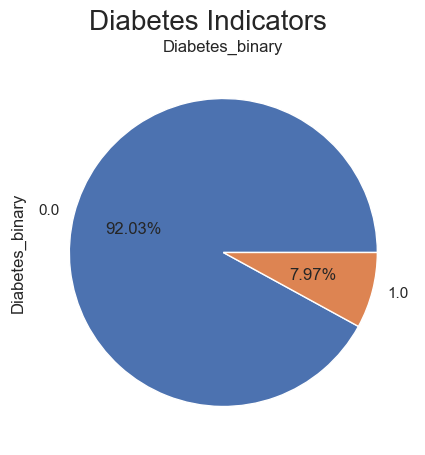

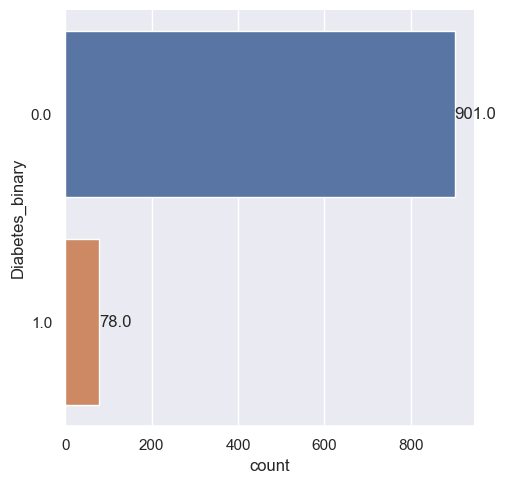

In [10]:
# Percentage PieChat to show the distribution for Diabetes_binary
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
Data["Diabetes_binary"].value_counts().plot.pie(autopct='%.2f%%', title="Diabetes_binary")
plt.suptitle('Diabetes Indicators', fontsize=20)
plt.show()

# Count plot for the number of individuals in the dataset that on their diagnosis on their diabete status. 
got_diabetes = sb.catplot(y = "Diabetes_binary", data = Data, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = got_diabetes.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

The result shows that the number of diabetes cases at our age is relatively low but still concerning.

Lets first start off with Exploration Data Analysis for the remaining columns to better understand this dataset.  

-----

Since 'AnyHealthcare', 'NoDocbcCost', 'Education' and 'Income' are related to a person's social economic background, we remove those as it is not relevant to youths.

In addition, we also removed 'CholCheck' which indicated if an individual has had any checkup in the past 5 years as it is not pertinent in determining diabetes risk at the aged group 18-24. At best, one might draw a weak conclusion that it reflects the tendency of an individual to engage in preventative health behaviors or receive early interventions to reduce diabetes risk.

In [11]:
# Removing unwanted columns (AnyHealthcare, NoDocbcCost, Education, Income)
Data.drop(['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income', 'CholCheck'], axis='columns', inplace=True)

Data.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
5,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0
121,0.0,0.0,0.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,0.0,1.0,1.0
149,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0
201,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
225,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


For the remaining datas: 

We can sort the columns into four different section by relevance. 
1) Individual statistic which consist of 'BMI' and 'Sex'(Gender)
2) Lifestyle_habits which consist of 'Smoker', 'PhysActivity' and 'HvyAlcoholConsump'
3) Diet which consist of 'Fruits' and 'Vegetable'
4) Medical Condition which consist of 'HighBP', 'HighChol', 'Stroke', 'HeartDeseaseorAttack', 'GenHealth', 'MentHlth', 'PhysHlth', 'DiffWalk'. 

This can help us to investigate whether an individual's diagnosis of diabetes is influenced by their lifestyle choices, diet, medical conditions, and individual statistics.

----

## Uni-Variate Exploration

First, we can look into Uni-Variate Exploration. 

Let us analyse the percentage of the various catogories for each categorical data in this data set. The rationale for this is because of the nature of the data for each column.

-----

First, let's understand the individuals from our Data set

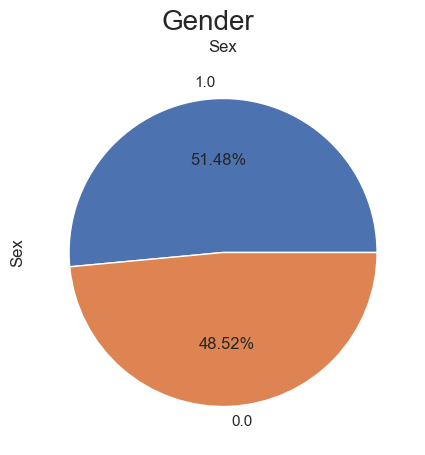

<AxesSubplot:xlabel='BMI'>

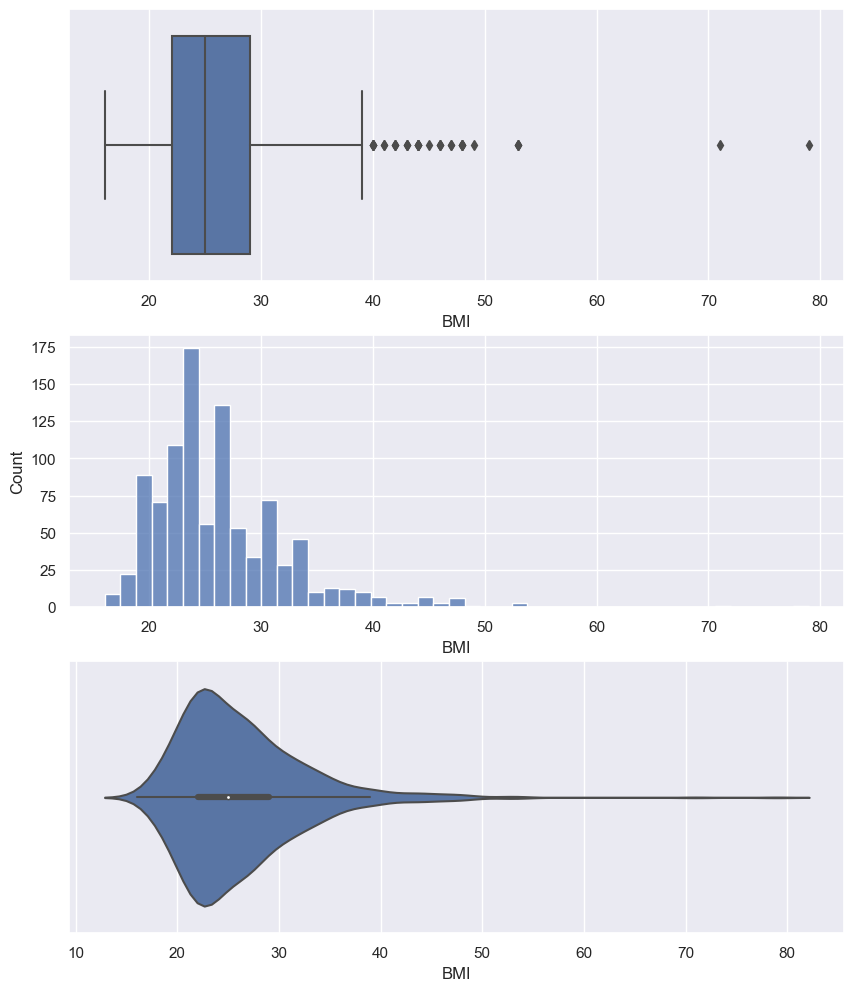

In [12]:
# Percentage PieChat to show the distribution for Sex
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
Data["Sex"].value_counts().plot.pie(autopct='%.2f%%', title="Sex")
plt.suptitle('Gender', fontsize=20)
plt.show()

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10, 12))

# Uni-Variate Exploration for BMI data
sb.boxplot(x = "BMI", data = Data, orient = "h", ax = axes[0])
sb.histplot(x = "BMI", data = Data, ax = axes[1])
sb.violinplot(x = "BMI", data = Data, orient = "h", ax = axes[2])

From the piechart, we can see that the number of Females and Males in this dataset is fairly balanced. This is good as this shows that our dataset help us to avoid gender bias in our analysis.

From the violin plot, we can see the general characteristic of our population's BMI lies within the 20-30 range, with it being skewed towards the right. 

------

Next, let's look at their lifestyle habits

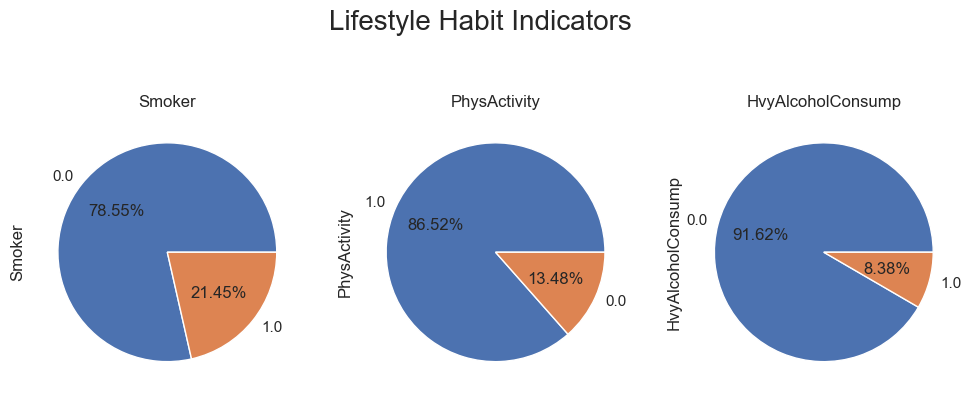

In [7]:
lifestyle_habits = ["Smoker","PhysActivity", "HvyAlcoholConsump"]

# Percentage piechart to show the distribution for each of the lifestlye habit indicators
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(lifestyle_habits):
    Data[col].value_counts().plot.pie(ax=ax[i%3], autopct='%.2f%%', title=col)
plt.suptitle('Lifestyle Habit Indicators', fontsize=20)
plt.show()

We can see that:
- more than 80% of our target audience do lead an active lifestyle 
- more than 90% of them do not consume alcohol excessively
- more than 75 % of them do not smoke 

----

Moving on, let's explore their diet. 

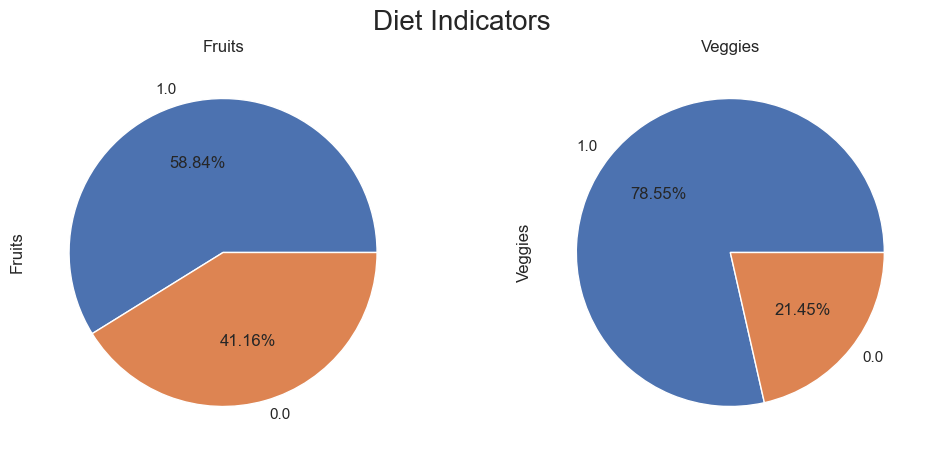

In [8]:
diet = ["Fruits", "Veggies"]

# Percentage piechart to show the distribution for each of the Diet indicators
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(diet):
    Data[col].value_counts().plot.pie(ax=ax[i%2], autopct='%.2f%%', title=col)
plt.suptitle('Diet Indicators', fontsize=20)
plt.show()

We can see that: 
- almost half of our target audience population DO NOT have the habit to consume fruits daily
- slightly less than 1/4 of our target audience DO NOT consume vegetables daily

--- 

Lastly, their medical condition

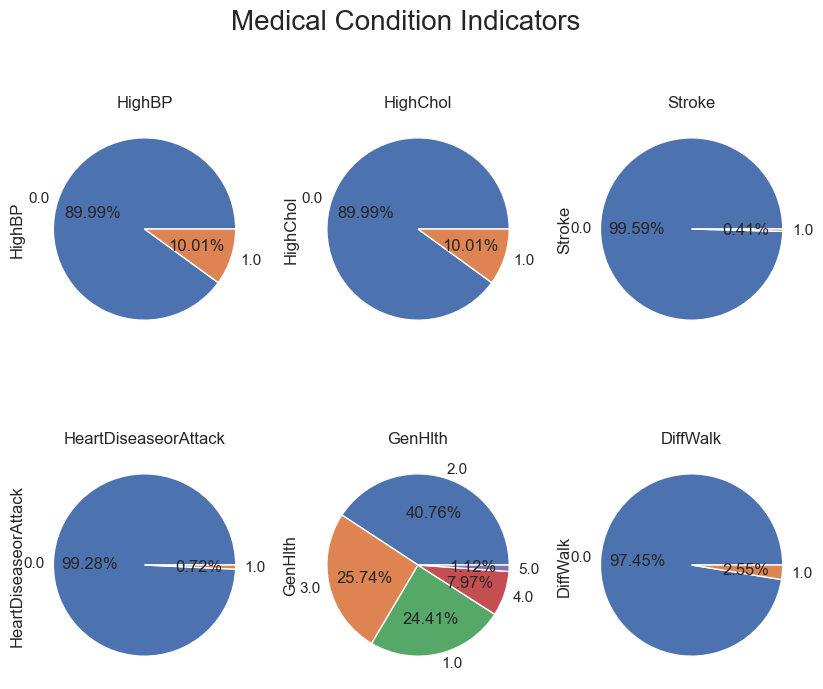

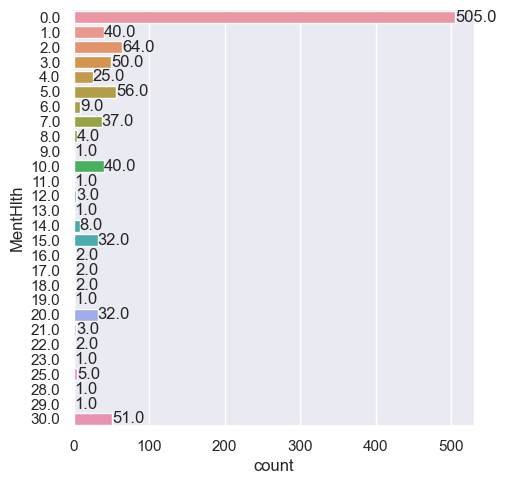

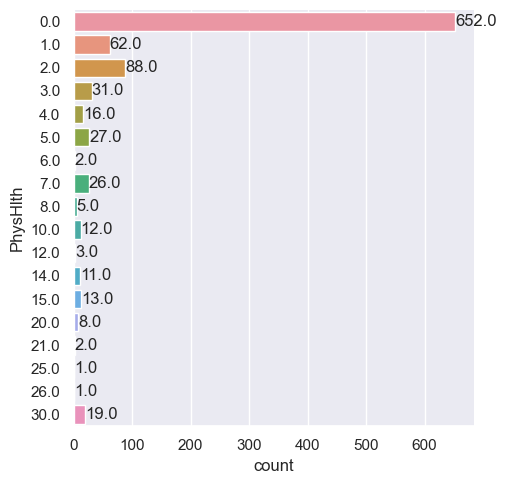

In [13]:
health = ["HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", "GenHlth", "DiffWalk"]

# Percentage piechart to show the distribution for each of the Health indicators
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
for i, col in enumerate(health):
    Data[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Medical Condition Indicators', fontsize=20)
plt.show()


# Count Plot for MentHlth as it has mutli-class categories
mental_health = sb.catplot(y = "MentHlth", data = Data, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = mental_health.facet_axis(0, 0)  # or ax = g.axes.flat[0]
# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
    
# Count Plot for PhysHlth as it has mutli-class categories

physical_health = sb.catplot(y = "PhysHlth", data = Data, kind = "count")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = physical_health.facet_axis(0, 0)  # or ax = g.axes.flat[0]
# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

We can see that: 
- 10% of our population suffer from HighBP and HighChol
- Almost all of our population DO NOT have medical history of Stroke, HeartDiseaseorAttack and have DiffWalk
- The general Health of our population is spreaded across the five levels with level 2 being the majority (#5 being lowest level of well-being)
- Majority of our population do not suffer from serious Mental and Physical Health issues but there is still a concerning amount of youths that do experience them. 

Based on the result above, we can remove the indicator of stroke, HeartDiseaseorAttack and DiffWalk as it doesn't provide additional information to represent the population. 


The codes for the Data Visualisation for the piechart is reference from the below link:
https://www.kaggle.com/code/yannansu/predict-diabetes-with-health-indicators

----- 

From our Uni-Variate Exploration, we notice that majority of our population has a similar data result. This lead to our motivation to investigate whether individuals who have diabetes share common characteristics such as an inactive lifestyle, poor diet, and other medical conditions. 

Moving ahead, we will conduct Bi-variate exploration to see if those indicators above really do have its effect on one's diabetic status. 

---

In [14]:
Data.drop(['Stroke', 'HeartDiseaseorAttack', 'DiffWalk'], axis='columns', inplace=True)


## Bi-Variate Exploration

First, let's start our Bi-variate exploration with one's sex with their Diabetic Status. 

<AxesSubplot:xlabel='Sex'>

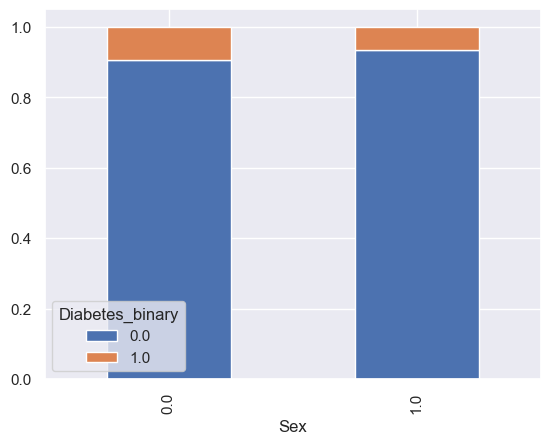

In [15]:
# Displaying the percentage of individuals of each sex and their Diabetic status
pd.crosstab(Data['Sex'],Data['Diabetes_binary'],normalize='index').plot.bar(stacked=True)

#Note: 0 -> female and 1 -> male

The result above tells us that females have a slightly higher probability of being diagnosed with diabetes as compared to men. 

---
Next, let's look at one's BMI with their diabetic status.

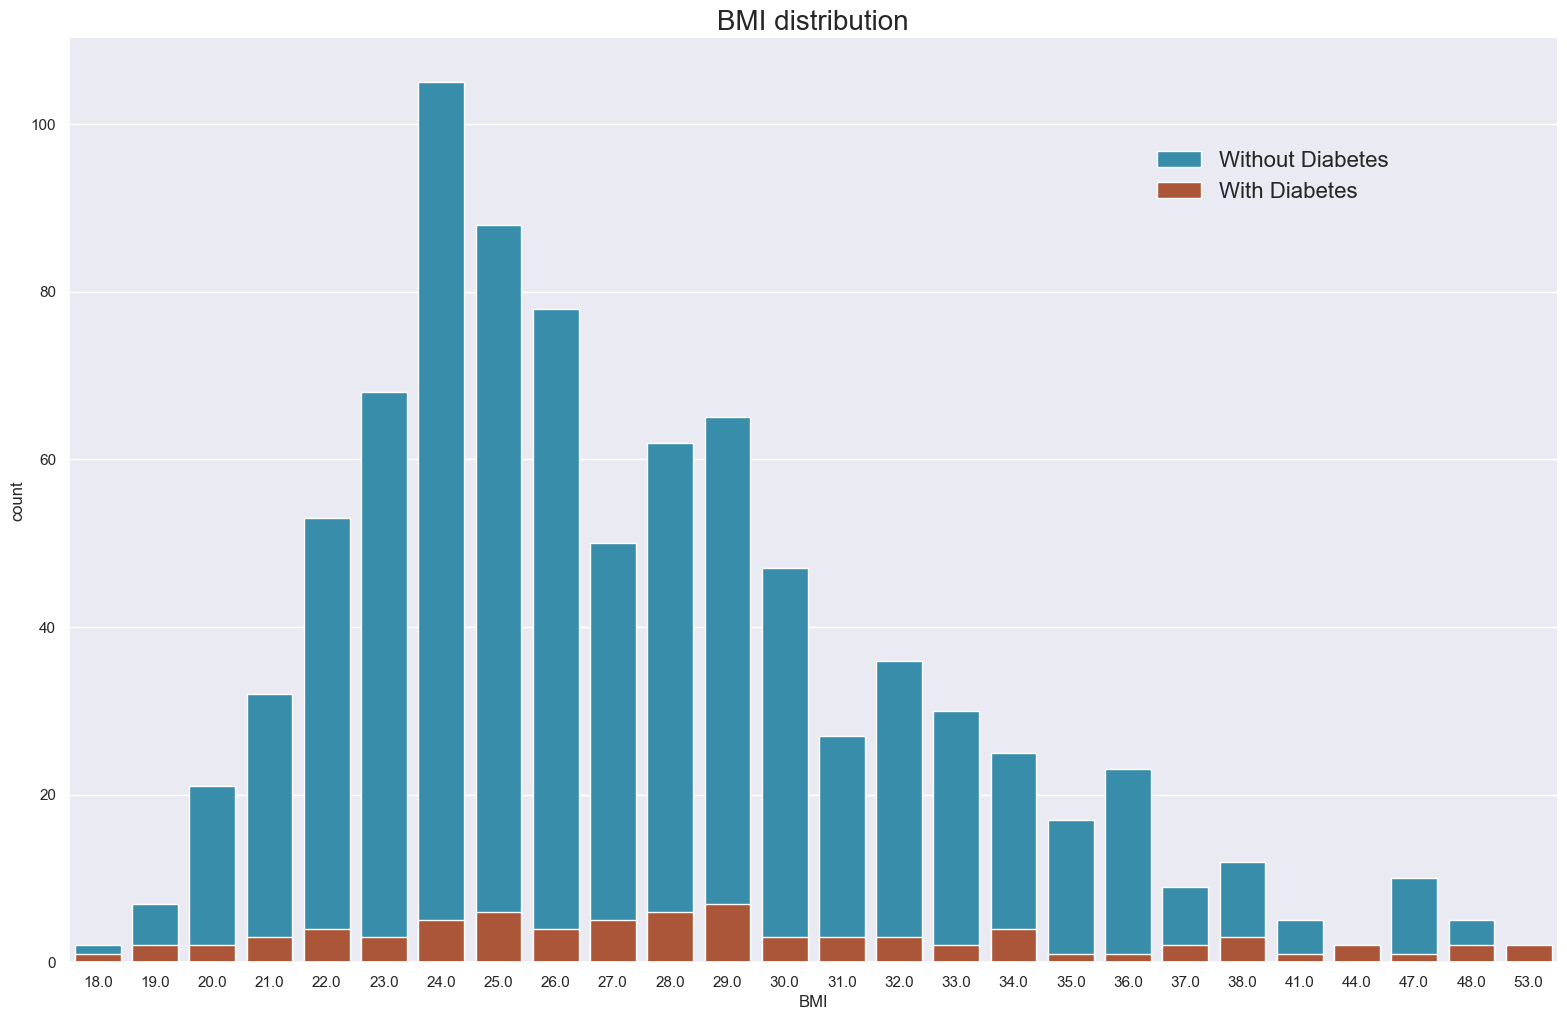

In [16]:
# Configuration of diagram size 
ratio = 12
plt.figure(figsize=(ratio*1.6,ratio))
colors = ['#be4d25','#2596be']

# Count Plot for each BMI group along with their Diabetes_binary status
sns.countplot(x=(Data[Data['Diabetes_binary']==False]['BMI']), color=colors[1], label="Without Diabetes")
sns.countplot(x=(Data[Data['Diabetes_binary']==True]['BMI']), color=colors[0], label="With Diabetes" )
sns.despine()
plt.title("BMI distribution", size=20)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':16});

From the BMI distribution, we observed that the distribution of diabetic youths is consistent across the BMI range and shows no obvious trend related to diabetic status. 

code for thiss diagram is reference from: https://www.kaggle.com/code/gabrielsober/diabetes-eda-prediction

<AxesSubplot:xlabel='BMI', ylabel='Diabetes_binary'>

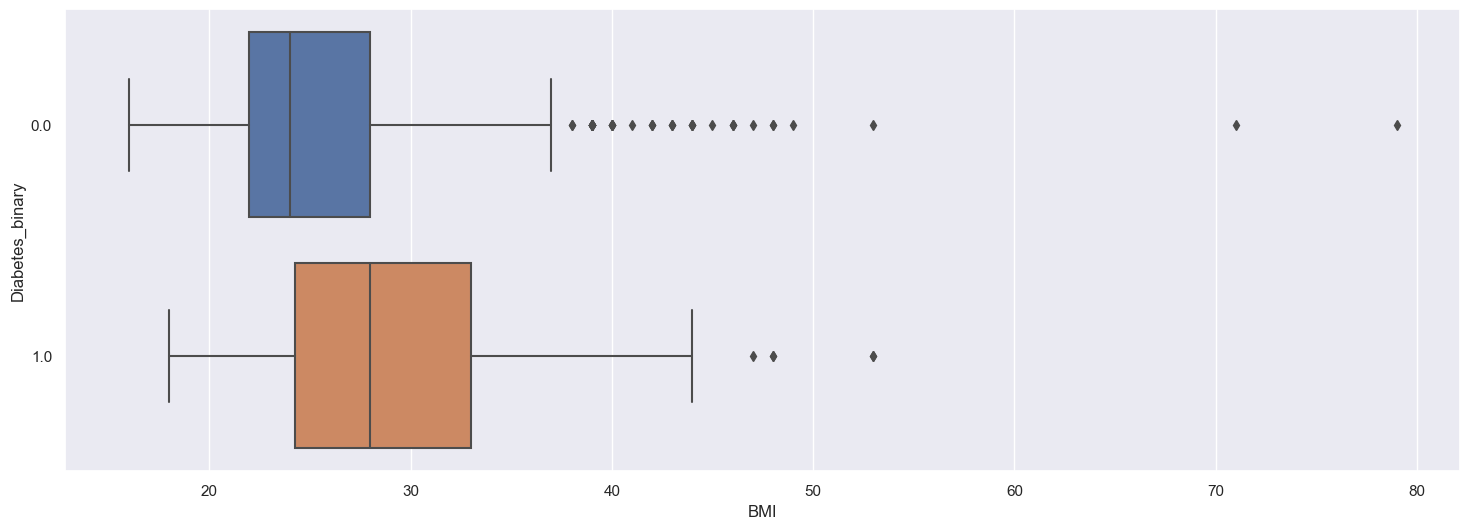

In [16]:
# Joint Boxplot of BMI against Diabete_binary
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "BMI", y = "Diabetes_binary", data = Data, orient = "h")

We investigate further with boxplots and found that the diabetic group has a significantly higher median than that of no-diabetes group. This shows that youths with diabetes tend to have higher BMI as compared to those without. In fact, a significant amount of diabetics here are obese (BMI>30). 


Singapore Heart Foundation, claim that our BMI should be between 18.5-22.9kg/m^2 to have a low risk of heart disease and diabetes. However, we see that there are still diabetic youths in this stated range.

This boxplot tells us something interesting. It tells us that low BMI does not necessary reduce one's risk to be diagnosed with diabetes since there are other factors at play that may affect this correlation.  

reference: https://www.myheart.org.sg/tools-resources/bmi-calculator/ 

Since an individual's BMI, which consist of their height and weight, has effects on their diabetic status, let's further analyse the data by looking at their diet, specifically on their consumption of Fruits and Vegetable with their diabetic status. 

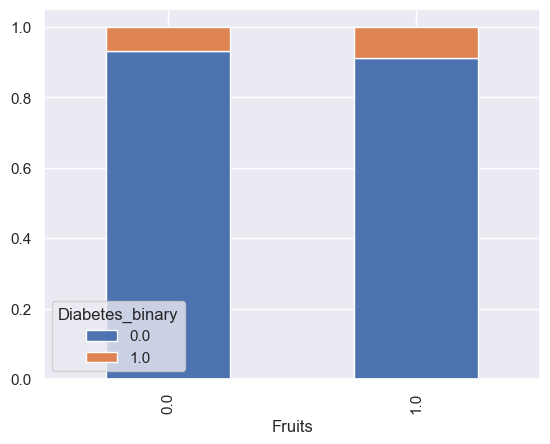

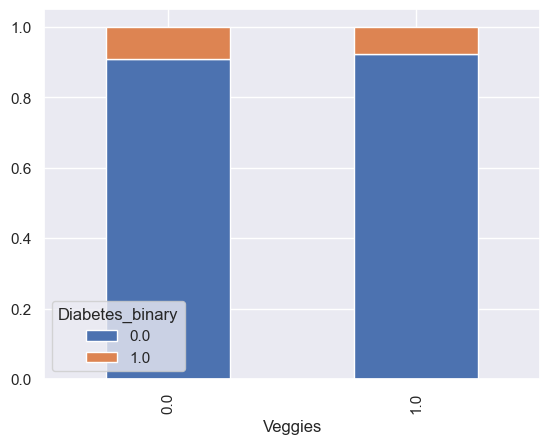

In [17]:
# Displaying the percentage of individuals that eat Fruits/Veggies and their Diabetic status respectively
for col in diet: 
    pd.crosstab(Data[col],Data['Diabetes_binary'],normalize='index').plot.bar(stacked=True)

This result is surprising as seen from both Bi-Variate Exploration. 

The percentage of diabetic individuals that eat/do not eat Fruits is comparable to one another. This is the case for Veggies too. 

This shows that those that being diagnosed with diabetes and their diet might not that have such a strong correlation. 

-----
Next, let's explore about that individual's lifestyle, specifically on their smoking status, alcohol consumption and PhysActivity and their relation to their diabetic status

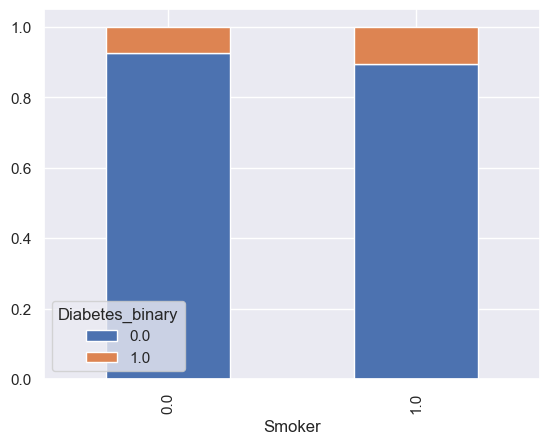

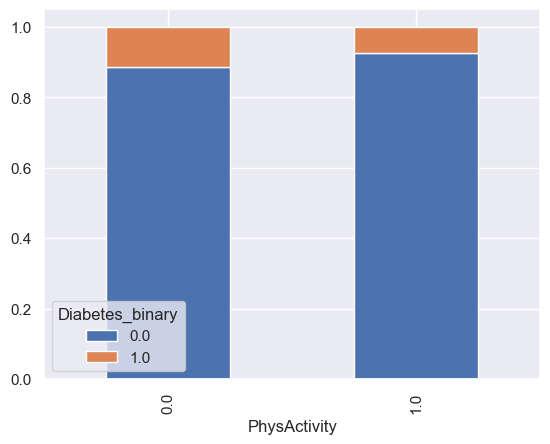

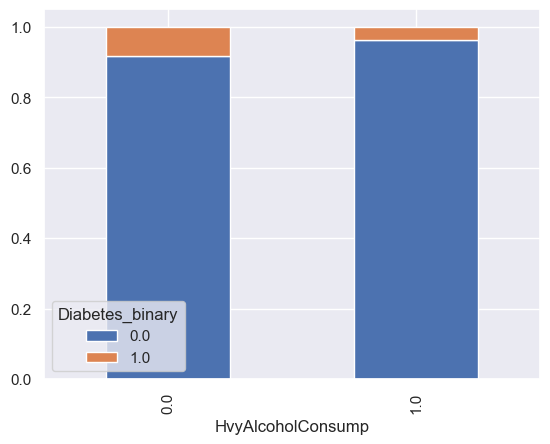

In [18]:
# Displaying the percentage of individuals for their lifestyle habits and their Diabetic status individually.
for col in lifestyle_habits:
    pd.crosstab(Data[col],Data['Diabetes_binary'],normalize='index').plot.bar(stacked=True)

This result is similar to the result obtained for the comparison between one's diabetic status and their diet. 

The number of diabetic individuals in each column for the three table are comparable. 

Interestingly, this shows that one being diagnosed with diabetes at the age 18-24 might not have a strong corelation to their smoking, alcohol consumption, physical activity status. 

-----

Lastly, let's take a look to find out the relationship between one's Medical condition and their diabetic status.

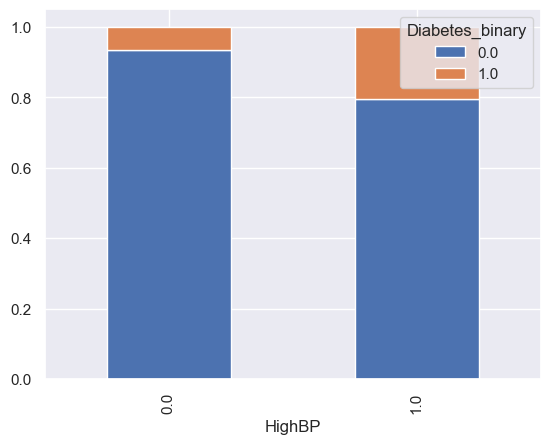

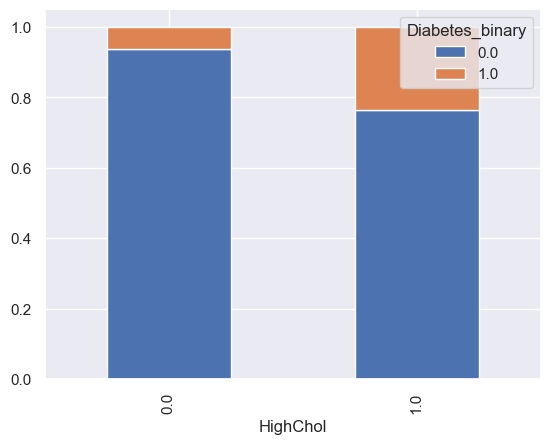

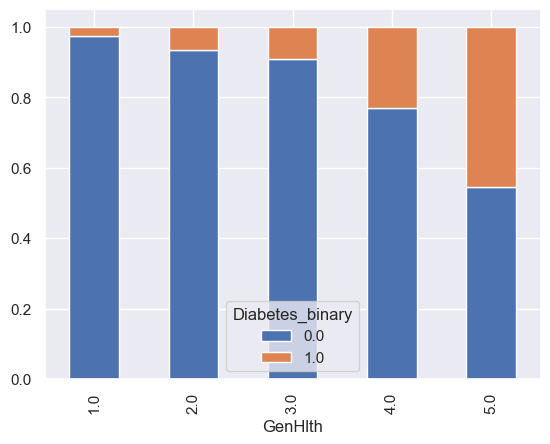

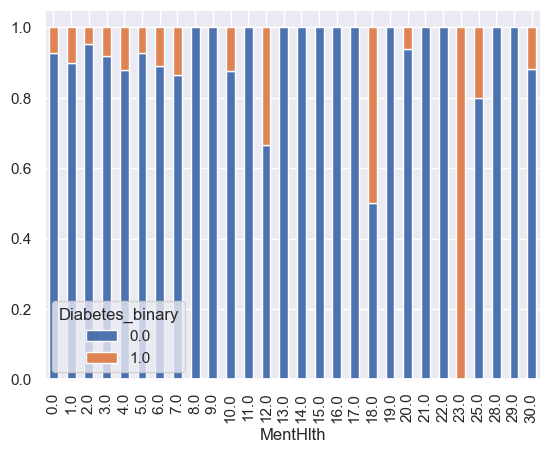

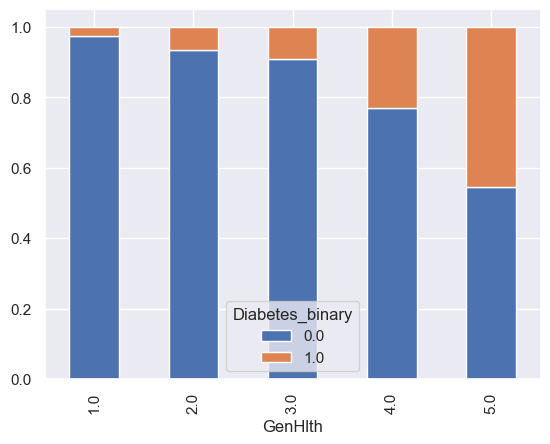

In [21]:
health = ["HighBP", "HighChol", "GenHlth", "MentHlth", "GenHlth"]
    
# Displaying the percentage of individuals for their Medical Condition status and their Diabetic status individually.
for col in health:
    pd.crosstab(Data[col],Data['Diabetes_binary'],normalize='index').plot.bar(stacked=True) 

From the table, we observe that there is a higher proportion of diabetics in youths with HighBP/HighChol/GenHlth >= level 4.

This suggest a correlation between these indicators and dibates.

Furthermore, for MentHlth, we can see that youths who suffered 23 days of poor mental health in the past 30 days ,specifically, has diabetes.

As for PhysHlth, we can see that youths who suffered from physical illness or injury for 25 and 26 days out of the past 30 days has diabetes.

In general, although inconsistent, we observed that youths who suffer from mental and physical health more frequently, are more likely to be diabetic.  

----

The Bi-Varaite Exploration on the individual's Medical Condition section with their diabetes_binary tells us that there could be a possibility of one's categorical state (Medical Condition) having a strong correlation with their diabetic status. 

However, since from our Uni-Variate Exploration on the Medical Condition section, we can see that there's an imbalance number of individuals in each categorical state. Hence, the result from this bi-variate Exploration might be misleading. 

Hence, let's take things further for the analysis for this Bi-Variate Exploration. 


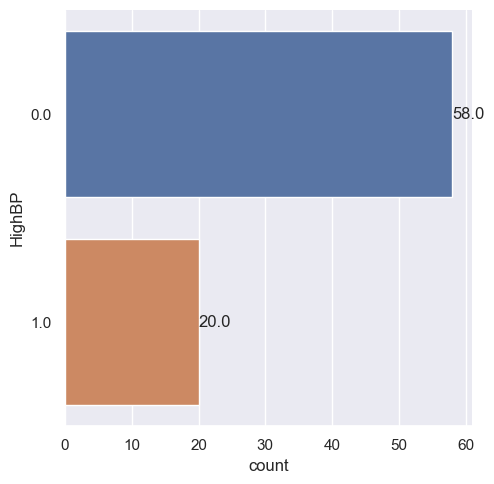

In [17]:
# Extracting individuals with HighBP and has diabetes
has_highBP = Data.loc[Data['HighBP'] == 1]
has_highBP = pd.DataFrame(has_highBP)
has_highBP = has_highBP.loc[has_highBP["Diabetes_binary"] == 1]
has_highBP = pd.DataFrame(has_highBP)

# Extracting individuals with HighBP and has diabetes
no_highBP = Data.loc[Data['HighBP'] == 0]
no_highBP = pd.DataFrame(no_highBP)
no_highBP = no_highBP.loc[no_highBP["Diabetes_binary"] == 1]
no_highBP = pd.DataFrame(no_highBP)

diabetic_BP = pd.concat([has_highBP, no_highBP])

#Count plot for the number of diabetic individuals and if they have HighBP 
diabete_BP = sb.catplot(y = "HighBP", data = diabetic_BP, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = diabete_BP.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

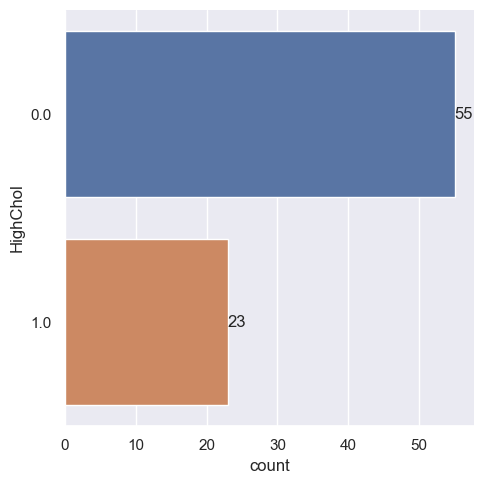

In [22]:
# Extracting individuals with HighChol and has diabetes
has_highCHOL = Data.loc[Data['HighChol'] == 1]
has_highCHOL = pd.DataFrame(has_highCHOL)
has_highCHOL = has_highCHOL.loc[has_highCHOL["Diabetes_binary"] == 1]

# Extracting individuals with no HighChol and has diabetes
no_highCHOL = Data.loc[Data['HighChol'] == 0]
no_highCHOL = pd.DataFrame(no_highCHOL)
no_highCHOL = no_highCHOL.loc[no_highCHOL["Diabetes_binary"] == 1]

diabetic_CHOL = pd.concat([has_highCHOL, no_highCHOL])

# Count plot for the number of diabetic individuals and if they have HighChol 
diabete_CHOL = sb.catplot(y = "HighChol", data = diabetic_BP, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = diabete_CHOL.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

The result from both count plot above shows us that having HighBP and HighChol, even though it's known to have a relation to be diagnosed with diabetes is not really a good indicator per se, for predicting one's diabetic status for the age group 18-24. As there's less than half of the diabetic population having either or both HighChol or HighBP. 

Next, let's look at individuals general health and their diabetic status. 

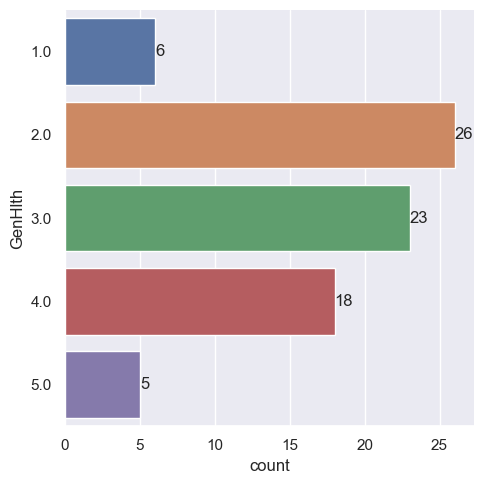

In [23]:
# Extracting individuals that is diagnosed with diabetes for each GenHlth state 
gen_health = Data.loc[Data['Diabetes_binary'] == 1]
gen_health = pd.DataFrame(gen_health)

# Count plot for the number of diabetic individuals and their respective GenHlth category. 
each_gen_health = sb.catplot(y = "GenHlth", data = gen_health, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = each_gen_health.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Since 1 in GenHlth means rating themselves excellent and 5 in GenHlth means rating themselves poor. 

We can see that mojority of diabetic individuals has GenHlth state as 2, 3 or 4.

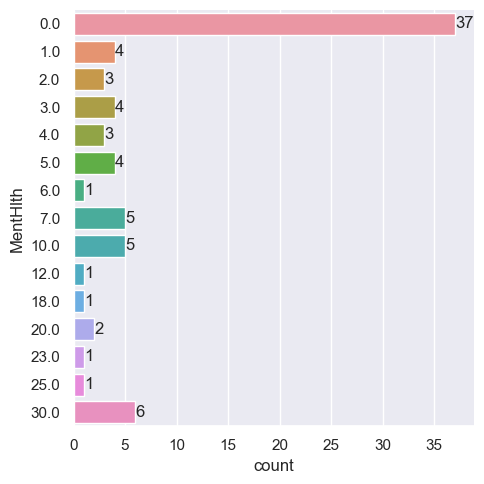

In [24]:
# Extracting individuals that is diagnosed with diabetes for each MenHlth state 
ment_health = Data.loc[Data['Diabetes_binary'] == 1]
ment_health = pd.DataFrame(ment_health)

#Count plot for the number of diabetic individuals in their respective MenHlth category. 
each_ment_health = sb.catplot(y = "MentHlth", data = ment_health, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = each_ment_health.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

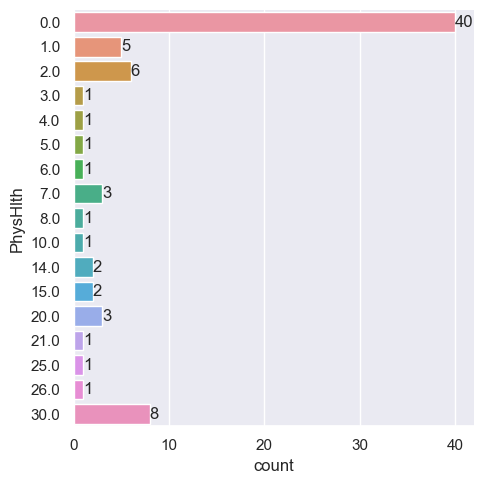

In [25]:
# Extracting individuals that is diagnosed with diabetes. 
phys_health = Data.loc[Data['Diabetes_binary'] == 1]
phys_health = pd.DataFrame(phys_health)

# Count plot for the number of diabetic individuals and their PhysHlth state 
each_phys_health = sb.catplot(y = "PhysHlth", data = phys_health, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = each_phys_health.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

From the above 2 graph, we can see that youths who suffer from diabetes generally have good mental and physical health within the past month.

Hence, we can conclude that individually, the columns in Medical Condition, have majority diabetic individuals clustering at the same catogerical state for each column (PhysHlth, MentHlth, GenHlth, HighBP, HighChol). 

However, those catogerical state that diabetic individuals end up clustering for those repective columns only made up a small proportion of that catogerical state population. 

This let us conclude that the correlation for each individual columns in Medical Condition section might not have that of a strong corelation with diabetic status.

-----

From our Exploration Data Analysis, 

During our Exploration Data Analysis, we first conducted Uni-Varaite Exploration on the cleaned data to observe the percentage of the population in each category for each categorical variable. We observed that only a small percentage of the population has an "unhealthy" lifestyle or "poor" medical condition, and less than half of the population has the habit of consuming Fruits/Veggies. 

This motivated us to look for a variable that has a strong correlation with one's diabetic status. We then proceeded with our Bi-Variate Exploration but found no variable that has a strong correlation with one's diabetic status, which was surprising. 

This gave us some insights and direction for our machine learning method where we plan to use multi-variate clustering and anomoly detection models to predict if one is diagnosed with diabetes. In addition, to combat biases from our data imbalance, we plan to use statistical techniques like Synthetic Minority Oversampling Technique (SMOTE). More details in our Machine learning portion.

-----